<a href="https://colab.research.google.com/github/zhengwu123/Machine_learning_group_project/blob/master/fake_real_data_aug_final_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import cv2
from PIL import Image
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import numpy as np


Using TensorFlow backend.


In [0]:
!rm -rf real_main
!rm -rf real_nei
!rm -rf real_side
!rm -rf real_tongue
!rm -rf real_console
!rm -rf real_lid
!rm -rf unsorted/


In [2]:
#!ls "/content/drive/My Drive"

!unzip "/content/drive/My Drive/sorted.zip" -d "/content"

Archive:  /content/drive/My Drive/sorted.zip
   creating: /content/real_tongue/
  inflating: /content/real_tongue/RackMultipart20200503-26620-1akr951.jpg  
   creating: /content/__MACOSX/
   creating: /content/__MACOSX/real_tongue/
  inflating: /content/__MACOSX/real_tongue/._RackMultipart20200503-26620-1akr951.jpg  
  inflating: /content/real_tongue/RackMultipart20200416-10895-9smho0.jpg  
  inflating: /content/__MACOSX/real_tongue/._RackMultipart20200416-10895-9smho0.jpg  
  inflating: /content/real_tongue/RackMultipart20200503-13017-1bdk7p6.jpg  
  inflating: /content/__MACOSX/real_tongue/._RackMultipart20200503-13017-1bdk7p6.jpg  
  inflating: /content/real_tongue/RackMultipart20200503-18464-cpyarc.jpg  
  inflating: /content/__MACOSX/real_tongue/._RackMultipart20200503-18464-cpyarc.jpg  
  inflating: /content/real_tongue/RackMultipart20200416-3289-1b3bwib.jpg  
  inflating: /content/__MACOSX/real_tongue/._RackMultipart20200416-3289-1b3bwib.jpg  
  inflating: /content/real_tongue/I

In [0]:
#rename all my files
import glob, os

def rename(dir, pattern, titlePattern):
    for pathAndFilename in glob.iglob(os.path.join(dir, pattern)):
        title, ext = os.path.splitext(os.path.basename(pathAndFilename))
        os.rename(pathAndFilename, 
                  os.path.join(dir, titlePattern % title + ext))
#rename all files
rename('real_di', '*.JPG', '%s'+ " real")
rename('real_di', '*.jpg', '%s'+ " real")

rename('real_nei', '*.JPG', '%s'+ " real")
rename('real_nei', '*.jpg', '%s'+ " real")

rename('real_main', '*.JPG', '%s'+ " real")
rename('real_main', '*.jpg', '%s'+ " real")

rename('real_tongue', '*.JPG', '%s'+ " real")
rename('real_tongue', '*.jpg', '%s'+ " real")

rename('real_console', '*.JPG', '%s'+ " real")
rename('real_console', '*.jpg', '%s'+ " real")

#fake
rename('fake_di', '*.JPG', '%s'+ " fake")
rename('fake_di', '*.jpg', '%s'+ " fake")

rename('fake_main', '*.JPG', '%s'+ " fake")
rename('fake_main', '*.jpg', '%s'+ " fake")

rename('fake_nei', '*.JPG', '%s'+ " fake")
rename('fake_nei', '*.jpg', '%s'+ " fake")

rename('fake_console', '*.JPG', '%s'+ " fake")
rename('fake_console', '*.jpg', '%s'+ " fake")

rename('fake_tougue', '*.JPG', '%s'+ " fake")
rename('fake_tougue', '*.jpg', '%s'+ " fake")

In [0]:
# prepare data
import random
train_real_di = ['real_di/{}'.format(i) for i in os.listdir("real_di/") if 'real' in i]
train_real_main = ['real_main/{}'.format(i) for i in os.listdir("real_main/") if 'real' in i]
train_real_console = ['real_console/{}'.format(i) for i in os.listdir("real_console/") if 'real' in i]
train_real_nei = ['real_nei/{}'.format(i) for i in os.listdir("real_nei/") if 'real' in i]
train_real_tongue = ['real_tongue/{}'.format(i) for i in os.listdir("real_tongue/") if 'real' in i]
#fake
train_fake_di = ['fake_di/{}'.format(i) for i in os.listdir("fake_di/") if 'fake' in i]
train_fake_main = ['fake_main/{}'.format(i) for i in os.listdir("fake_main/") if 'fake' in i]
train_fake_nei = ['fake_nei/{}'.format(i) for i in os.listdir("fake_nei/") if 'fake' in i]
train_fake_tongue = ['fake_tougue/{}'.format(i) for i in os.listdir("fake_tougue/") if 'fake' in i]
train_fake_console = ['fake_console/{}'.format(i) for i in os.listdir("fake_console/") if 'fake' in i]

train_images_di = train_fake_di + train_real_di
train_images_main = train_fake_main + train_real_main
train_images_nei = train_fake_nei + train_real_nei
train_images_console = train_fake_console + train_real_console
train_images_tongue = train_fake_tongue + train_real_tongue

random.shuffle(train_images_di)
random.shuffle(train_images_main)
random.shuffle(train_images_nei)
random.shuffle(train_images_console)
random.shuffle(train_images_tongue)


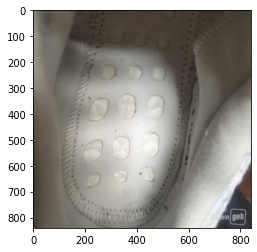

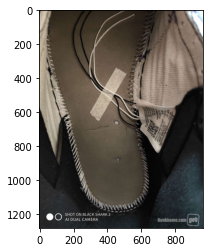

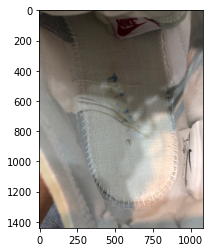

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for ima in train_images_nei[0:3]:
  img=mpimg.imread(ima)
  imgplot = plt.imshow(img)
  plt.show()

In [0]:
nrows = 150
ncolumns = 150
channels = 3  #change to 1 if you want to use grayscale image


#A function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'real' in image:
            y.append(1)
        elif 'fake' in image:
          y.append(0)
    
    return X, y

In [0]:
# put traing image into x , y
X1, y1 = read_and_process_image(train_images_di)
X2, y2 = read_and_process_image(train_images_main)
X3, y3 = read_and_process_image(train_images_nei)
X4, y4 = read_and_process_image(train_images_tongue)
X5, y5 = read_and_process_image(train_images_console)

X1 = np.array(X1)
y1 = np.array(y1)
X2 = np.array(X2)
y2 = np.array(y2)
X3 = np.array(X3)
y3 = np.array(y3)
X4 = np.array(X4)
y4 = np.array(y4)
X5 = np.array(X5)
y5 = np.array(y5)


In [278]:
print("Shape of train images is:", X1.shape)
print("Shape of labels is:", y1.shape)
print("Shape of train images is:", X2.shape)
print("Shape of labels is:", y2.shape)

Shape of train images is: (107, 150, 150, 3)
Shape of labels is: (107,)
Shape of train images is: (450, 150, 150, 3)
Shape of labels is: (450,)


In [0]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.1, random_state=2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.1, random_state=2)
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.1, random_state=2)
x_train4, x_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.1, random_state=2)
x_train5, x_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.1, random_state=2)

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Conv3D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import optimizers


In [0]:
#data augmentation
from keras.preprocessing.image import ImageDataGenerator
batch_size=64
# Define the image transformations here
gen = ImageDataGenerator(horizontal_flip = True,
                         vertical_flip = True,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,
                         zoom_range = 0.1,
                         rotation_range = 40)
gen_flow1 = gen.flow(x_train1,y_train1, batch_size=batch_size)
gen_flow2 = gen.flow(x_train2,y_train2, batch_size=batch_size)
gen_flow3 = gen.flow(x_train3,y_train3, batch_size=batch_size)
gen_flow4 = gen.flow(x_train4,y_train4, batch_size=batch_size)
gen_flow5 = gen.flow(x_train5,y_train5, batch_size=batch_size)

In [0]:

model_di = Sequential()

#add conv1
model_di.add(Conv2D(32,(3,3),activation='relu',strides=1,padding="VALID", input_shape=(150,150,3)))
#add pool1
model_di.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#add conv2
model_di.add(Conv2D(64, (3, 3),strides=(3,3),activation='relu',padding="VALID"))
#add pool2
model_di.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_di.add(Flatten())
model_di.add(Dense(512, activation='relu'))
model_di.add(Dense(1, activation='sigmoid'))
model_di.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#x_train = np.array(real_image_array)
#x_test = np.array(fake_images_array)
#y_train = np.array(fake_images_array)
#y_test = np.array(y_test)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
#model.fit(x_train,y_train,batch_size=100,epochs=50)
r_di = model_di.fit(gen_flow1,steps_per_epoch=len(x_train1) / batch_size, epochs=500)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [0]:
model_main = Sequential()

#add conv1
model_main.add(Conv2D(32,(3,3),activation='relu',strides=1,padding="VALID", input_shape=(150,150,3)))
#add pool1
model_main.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#add conv2
model_main.add(Conv2D(64, (3, 3),strides=(3,3),activation='relu',padding="VALID"))
#add pool2
model_main.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_main.add(Flatten())
model_main.add(Dense(512, activation='relu'))
model_main.add(Dense(1, activation='sigmoid'))
model_main.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#x_train = np.array(real_image_array)
#x_test = np.array(fake_images_array)
#y_train = np.array(fake_images_array)
#y_test = np.array(y_test)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
#model.fit(x_train,y_train,batch_size=100,epochs=50)
r_main = model_main.fit(gen_flow2,steps_per_epoch=len(x_train2) / batch_size, epochs=500)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [28]:
model_nei = Sequential()

#add conv1
model_nei.add(Conv2D(32,(3,3),activation='relu',strides=1,padding="VALID", input_shape=(150,150,3)))
#add pool1
model_nei.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#add conv2
model_nei.add(Conv2D(64, (3, 3),strides=(3,3),activation='relu',padding="VALID"))
#add pool2
model_nei.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_nei.add(Flatten())
model_nei.add(Dense(512, activation='relu'))
model_nei.add(Dense(1, activation='sigmoid'))
model_nei.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#x_train = np.array(real_image_array)
#x_test = np.array(fake_images_array)
#y_train = np.array(fake_images_array)
#y_test = np.array(y_test)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
#model.fit(x_train,y_train,batch_size=100,epochs=50)
r_nei = model_main.fit(gen_flow3,steps_per_epoch=len(x_train3) / batch_size, epochs=500)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Epoch 1/500
5/4 [=================================] - 1s 204ms/step - loss: 1.8997 - accuracy: 0.5069
Epoch 2/500
5/4 [=================================] - 1s 198ms/step - loss: 1.0857 - accuracy: 0.4722
Epoch 3/500
5/4 [=================================] - 1s 201ms/step - loss: 1.1384 - accuracy: 0.4931
Epoch 4/500
5/4 [=================================] - 1s 201ms/step - loss: 0.8424 - accuracy: 0.4896
Epoch 5/500
5/4 [=================================] - 1s 199ms/step - loss: 0.8217 - accuracy: 0.5139
Epoch 6/500
5/4 [=================================] - 1s 199ms/step - loss: 0.7560 - accuracy: 0.5035
Epoch 7/500
5/4 [=================================] - 1s 199ms/step - loss: 0.7421 - accuracy: 0.4896
Epoch 8/500
5/4 [=================================] - 1s 198ms/step - loss: 0.7419 - accuracy: 0.5139
Epoch 9/500
5/4 [=================================] - 1s 197ms/step - loss: 0.6874 - accuracy: 0.5104
Epoch 10/500
5/4 [=================================] - 1s 198ms/step - loss: 0.692

In [0]:
model_tongue = Sequential()

#add conv1
model_tongue.add(Conv2D(32,(3,3),activation='relu',strides=1,padding="VALID", input_shape=(150,150,3)))
#add pool1
model_tongue.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#add conv2
model_tongue.add(Conv2D(64, (3, 3),strides=(3,3),activation='relu',padding="VALID"))
#add pool2
model_tongue.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_tongue.add(Flatten())
model_tongue.add(Dense(512, activation='relu'))
model_tongue.add(Dense(1, activation='sigmoid'))
model_tongue.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#x_train = np.array(real_image_array)
#x_test = np.array(fake_images_array)
#y_train = np.array(fake_images_array)
#y_test = np.array(y_test)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
#model.fit(x_train,y_train,batch_size=100,epochs=50)
r_tongue = model_main.fit(gen_flow4,steps_per_epoch=len(x_train4) / batch_size, epochs=500)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [0]:
model_console = Sequential()

#add conv1
model_console.add(Conv2D(32,(3,3),activation='relu',strides=1,padding="VALID", input_shape=(150,150,3)))
#add pool1
model_console.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#add conv2
model_console.add(Conv2D(64, (3, 3),strides=(3,3),activation='relu',padding="VALID"))
#add pool2
model_console.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_console.add(Flatten())
model_console.add(Dense(512, activation='relu'))
model_console.add(Dense(1, activation='sigmoid'))
model_console.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#x_train = np.array(real_image_array)
#x_test = np.array(fake_images_array)
#y_train = np.array(fake_images_array)
#y_test = np.array(y_test)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
#model.fit(x_train,y_train,batch_size=100,epochs=50)
r_console = model_main.fit(gen_flow5,steps_per_epoch=len(x_train5) / batch_size, epochs=500)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [267]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
#testing ..................
test_result = model.predict(X)
print(y_test)
print(test_result)
test_result_array = []

for i in range(len(test_result)):

    if test_result[i][0] > 0.9:
      test_result_array.append(1)
    else:
      test_result_array.append(0)

    
count = 0
print(len(test_result_array))
for i in range(len(y)):
  if test_result_array[i] == y[i]:
    count += 1
test_accuracy = count/(len(y))

print("test accuracy:", test_accuracy)
average_precision = average_precision_score(y, test_result_array)

accuracy_score= accuracy_score(y, test_result_array)
print('Average accuracy_score : {0:0.2f}'.format(
      accuracy_score))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


[1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0]
[[9.94418859e-01]
 [9.99998569e-01]
 [9.95648682e-01]
 [9.97173786e-01]
 [3.54025559e-03]
 [7.39860843e-05]
 [9.99994278e-01]
 [1.00000000e+00]
 [2.80735898e-04]
 [9.06330124e-02]
 [9.99999523e-01]
 [1.73340052e-01]
 [9.99746501e-01]
 [9.95519876e-01]
 [5.59930563e-01]
 [1.27543847e-03]
 [9.11345780e-01]
 [1.00000000e+00]
 [4.84328717e-02]
 [1.00000000e+00]
 [9.99999762e-01]
 [2.42492139e-01]
 [9.91936922e-01]
 [9.98981059e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99995947e-01]
 [1.63048744e-01]
 [1.00000000e+00]
 [6.41589612e-02]
 [1.09818727e-01]
 [2.05184728e-01]
 [9.99999642e-01]
 [9.99998331e-01]
 [5.39873354e-12]
 [9.98603523e-01]
 [9.99972701e-01]
 [3.80580664e-01]
 [3.19507904e-02]
 [1.00000000e+00]
 [2.19457829e-03]
 [1.45849418e-02]
 [1.22621814e-02]
 [1.00000000e+00]
 [3.03493049e-02]
 [9.06622171e-01]
 [1.00000000e+00]
 [6.68470562e-03]
 [2.64596480e-07]
 [1.00000000e+00]
 [9.73657787e-01]
 [1.00000000e+00]
 [9.98439610e-01]


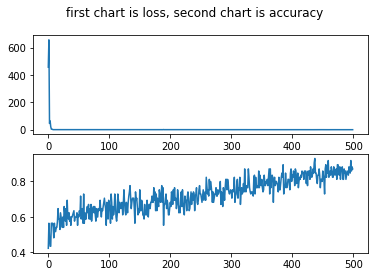

In [203]:
# plot loss per iteration
fig, axs = plt.subplots(2)
fig.suptitle('first chart is loss, second chart is accuracy')
axs[0].plot(r.history['loss'],label ='loss')
axs[1].plot(r.history['accuracy'],label ='accuracy')

In [236]:
#add data augmentation
i = Input(shape = x_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x= Flatten()(x)
x = Dense(512,activation='relu')(x)
x = Dense(1,activation='sigmoid')(x)
model = Model(i,x)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
#print(y_train[:10])
model.fit(gen_flow,steps_per_epoch=len(x_train) / batch_size, epochs=450)

2/1 [=============================================] - 3s 2s/step - loss: 0.7498 - accuracy: 0.5412
Epoch 81/450
2/1 [=============================================] - 3s 2s/step - loss: 0.7472 - accuracy: 0.5529
Epoch 82/450
2/1 [=============================================] - 3s 2s/step - loss: 0.6427 - accuracy: 0.6706
Epoch 83/450
2/1 [=============================================] - 3s 2s/step - loss: 0.6802 - accuracy: 0.5882
Epoch 84/450
1/1 [=====================>........] - ETA: 0s - loss: 0.6451 - accuracy: 0.6190

KeyboardInterrupt: ignored

In [188]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 500, 500, 3)]     0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 249, 249, 32)      896       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 61, 61, 128)       73856     
_________________________________________________________________
flatten_25 (Flatten)         (None, 476288)            0         
_________________________________________________________________
dense_50 (Dense)             (None, 512)               243859968 
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 513 

[1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0
 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0
 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1
 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 1 1 0]


In [189]:
#testing ..................
test_result = model.predict(x_test)
#print(test_result.shape)
print(y_test.shape)
test_result_array = []

for i in range(len(test_result)):

    if test_result[i] > 0.5:
      test_result_array.append(1)
    else:
      test_result_array.append(0)

    
count = 0
print(len(test_result_array))
for i in range(len(y_test)):
  if test_result_array[i] == y_test[i]:
    count += 1
test_accuracy = count/(len(y_test))

print("test accuracy:", test_accuracy)

(22,)
22
test accuracy: 0.5909090909090909


In [0]:
# test with new data

In [43]:
!unzip Archive.zip

Archive:  Archive.zip
   creating: real1 (9)-/
  inflating: real1 (9)-/Œ¢–≈Õº∆¨_20200507231506 real console.jpg  
replace __MACOSX/real1 (9)-/._Œ¢–≈Õº∆¨_20200507231506 real console.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/real1 (9)-/._Œ¢–≈Õº∆¨_20200507231506 real console.jpg  
  inflating: real1 (9)-/Œ¢–≈Õº∆¨_20200507231518 real main.jpg  
  inflating: __MACOSX/real1 (9)-/._Œ¢–≈Õº∆¨_20200507231518 real main.jpg  
  inflating: real1 (9)-/Œ¢–≈Õº∆¨_20200507231503 real tongue.jpg  
  inflating: __MACOSX/real1 (9)-/._Œ¢–≈Õº∆¨_20200507231503 real tongue.jpg  
  inflating: real1 (9)-/Œ¢–≈Õº∆¨_20200507231510 real console.jpg  
  inflating: __MACOSX/real1 (9)-/._Œ¢–≈Õº∆¨_20200507231510 real console.jpg  
  inflating: real1 (9)-/Œ¢–≈Õº∆¨_20200507231514 real nei.jpg  
  inflating: __MACOSX/real1 (9)-/._Œ¢–≈Õº∆¨_20200507231514 real nei.jpg  
  inflating: real1 (9)-/Œ¢–≈Õº∆¨_20200507231459 real tongue.jpg  
  inflating: __MACOSX/real1 (9)-/._Œ¢–≈Õº∆¨_20200507231459 real to

In [0]:
fake_di = ['fake/{}'.format(i) for i in os.listdir("fake/") if 'di' in i]
fake_main = ['fake/{}'.format(i) for i in os.listdir("fake/") if 'main' in i]
fake_nei = ['fake/{}'.format(i) for i in os.listdir("fake/") if 'nei' in i]
fake_tongue = ['fake/{}'.format(i) for i in os.listdir("fake/") if 'tongue' in i]
fake_console = ['fake/{}'.format(i) for i in os.listdir("fake/") if 'console' in i]

In [0]:

X_di, y_di = read_and_process_image(fake_di)
X_main, y_main = read_and_process_image(fake_main)
X_nei, y_nei = read_and_process_image(fake_nei)
X_tongue, y_tongue = read_and_process_image(fake_tongue)
X_console, y_console = read_and_process_image(fake_console)

X_di = np.array(X_di)
y_di = np.array(y_di)
X_main = np.array(X_main)
y_main = np.array(y_main)
X_nei= np.array(X_nei)
X_tongue= np.array(X_tongue)
X_console= np.array(X_console)

In [89]:
predict_1 = model_di.predict(X_di)
print(predict_1)
c1 = 0
for i in range(len(predict_1)):
   if predict_1[i] > 0.1:
     c1 = c1 +1
print(c1/len(predict_1))
print("----------")
c2 = 0
predict_main = model_main.predict(X_main)
for i in range(len(predict_main)):
   if predict_main[i] > 0.1:
     c2 = c2 +1
print(c2/len(predict_main))
print(predict_main)
print("----------")
c3 = 0
predict_nei = model_nei.predict(X_nei)
print(predict_nei)
for i in range(len(predict_nei)):
   if predict_nei[i] > 0.1:
     c3 = c3 + 1
print(c3/len(predict_nei))
print("----------")
c4 = 0
predict_tongue = model_tongue.predict(X_tongue)
print(predict_tongue)
for i in range(len(predict_tongue)):
   if predict_tongue[i] > 0.1:
     c4 = c4 + 1
print(c4/len(predict_tongue))
print("----------")
predict_console = model_console.predict(X_console)
print(predict_console)
c5 = 0
for i in range(len(predict_console)):
   if predict_console[i] > 0.1:
     c5 = c5 + 1


[[3.143302e-10]]
0.0
----------
0.5
[[0.00315706]
 [1.        ]
 [0.02202643]
 [0.14734204]]
----------
[[0.99999654]]
1.0
----------
[[1.]
 [1.]]
1.0
----------
[[3.5358049e-12]
 [9.6189004e-21]]


In [0]:
def test_accuracy(path):
  fake_di = [path+'/{}'.format(i) for i in os.listdir(path+"/") if 'di' in i]
  fake_main = [path+'/{}'.format(i) for i in os.listdir(path+"/") if 'main' in i]
  fake_nei = [path+'/{}'.format(i) for i in os.listdir(path+"/") if 'nei' in i]
  fake_tongue = [path+'/{}'.format(i) for i in os.listdir(path+"/") if 'tongue' in i]
  fake_console = [path+'/{}'.format(i) for i in os.listdir(path+"/") if 'console' in i]
  X_di, y_di = read_and_process_image(fake_di)
  X_main, y_main = read_and_process_image(fake_main)
  X_nei, y_nei = read_and_process_image(fake_nei)
  X_tongue, y_tongue = read_and_process_image(fake_tongue)
  X_console, y_console = read_and_process_image(fake_console)

  X_di = np.array(X_di)
  y_di = np.array(y_di)
  X_main = np.array(X_main)
  y_main = np.array(y_main)
  X_nei= np.array(X_nei)
  X_tongue= np.array(X_tongue)
  X_console= np.array(X_console)
  predict_1 = model_di.predict(X_di)
  predict_1 = model_di.predict(X_di)

  c1 = 0
  for i in range(len(predict_1)):
    if predict_1[i] > 0.1:
      c1 = c1 +1
  c1 = c1/len(predict_1)
  c2 = 0
  predict_main = model_main.predict(X_main)
  for i in range(len(predict_main)):
    if predict_main[i] > 0.1:
      c2 = c2 +1
  c2 = c2/len(predict_main)
  c3 = 0
  predict_nei = model_nei.predict(X_nei)

  for i in range(len(predict_nei)):
    if predict_nei[i] > 0.1:
      c3 = c3 + 1
  c3 = c3/len(predict_nei)
  c4 = 0
  predict_tongue = model_tongue.predict(X_tongue)

  for i in range(len(predict_tongue)):
    if predict_tongue[i] > 0.1:
      c4 = c4 + 1
  c4 = c4/len(predict_tongue)
  predict_console = model_console.predict(X_console)

  c5 = 0
  for i in range(len(predict_console)):
    if predict_console[i] > 0.1:
      c5 = c5 + 1
  c5 = c5/len(predict_console)
  count = c1+c2+c3+c4+c5 
  print(count)
  if count >= 3:
    return "real"
  else:
    return "fake"
  


In [96]:
test_accuracy("real2")

4.0


'real'